In [2]:
# dataset import
import pandas as pd
df = pd.read_csv("GPA Dataset.csv")

In [3]:
# dataset clean up

# check duplicates
print(len(df))
print(len(df.drop_duplicates()))

73
73


In [4]:
# fix and fill in blank values

# change all numbers so it looks like hours per day
# for column 'What is your average screentime?'
def fix_and_fill(row):
  val = row['What is your average screentime?']
  #print(val)
  if (val > 24.0) & (val < 150.0):
    row['What is your average screentime?'] = val / 24
  elif val > 150.0:
    row['What is your average screentime?'] = val / 60

  return row

df = df.apply(fix_and_fill, axis = 1)


In [5]:
import statistics as stat

# fill in blank integer cols with mode value of that col
for column in df.iloc[:, 9:]:
    col = df[column]
    mode_val = stat.mode(col)
    df[column] = df[column].fillna(value = mode_val)

df.iloc[:, 9:]

mode_val = stat.mode(df['At what age did you start programming?'])

df['At what age did you start programming?'] = df['At what age did you start programming?'].fillna(value = mode_val)

<Axes: >

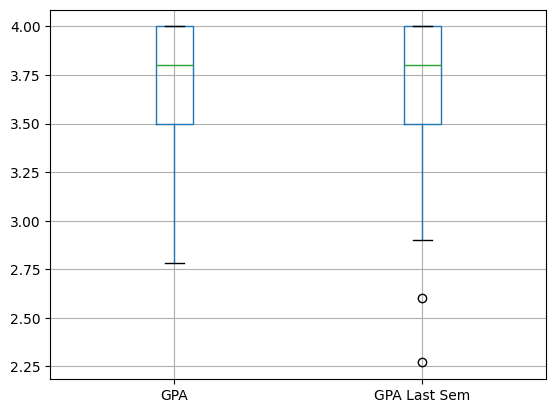

In [21]:
# histogram

# Rename columns
df = df.rename(columns={
    'What was your GPA LAST SEMESTER?': 'GPA',
    'What was your GPA THE SEMESTER BEFORE THAT?': 'GPA Last Sem'
})

#df['What was your GPA LAST SEMESTER?'].hist()
df.boxplot(column = ['GPA', 'GPA Last Sem'])

In [20]:
sleep_gpa_corr = df[['How many hours of sleep do you get a night?',
                           'What was your GPA LAST SEMESTER?']].corr().iloc[0, 1]

screentime_gpa_corr = df[['What is your average screentime?',
                                'What was your GPA LAST SEMESTER?']].corr().iloc[0, 1]

sleep_gpa_corr, screentime_gpa_corr

(0.18562969339678181, -0.0994582438263675)

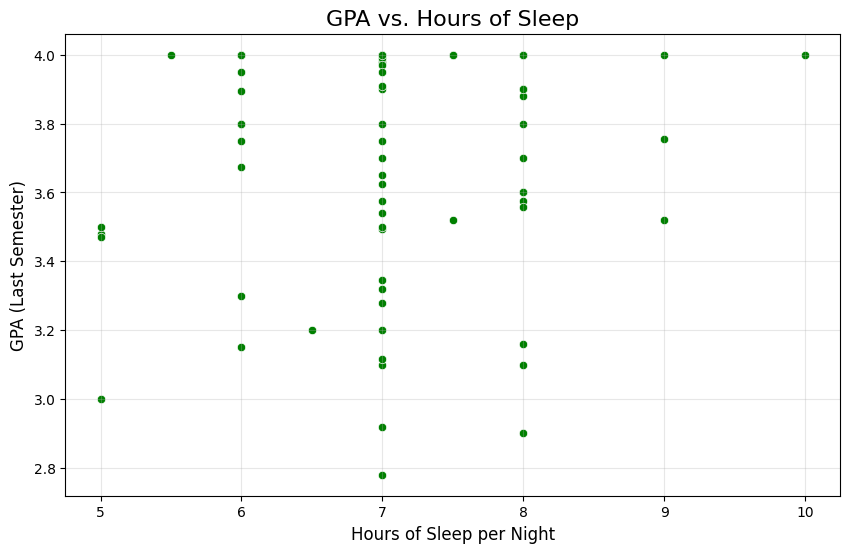

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x = df['How many hours of sleep do you get a night?'],
    y = df['What was your GPA LAST SEMESTER?'],
    color='green'
)
plt.title('GPA vs. Hours of Sleep', fontsize=16)
plt.xlabel('Hours of Sleep per Night', fontsize=12)
plt.ylabel('GPA (Last Semester)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

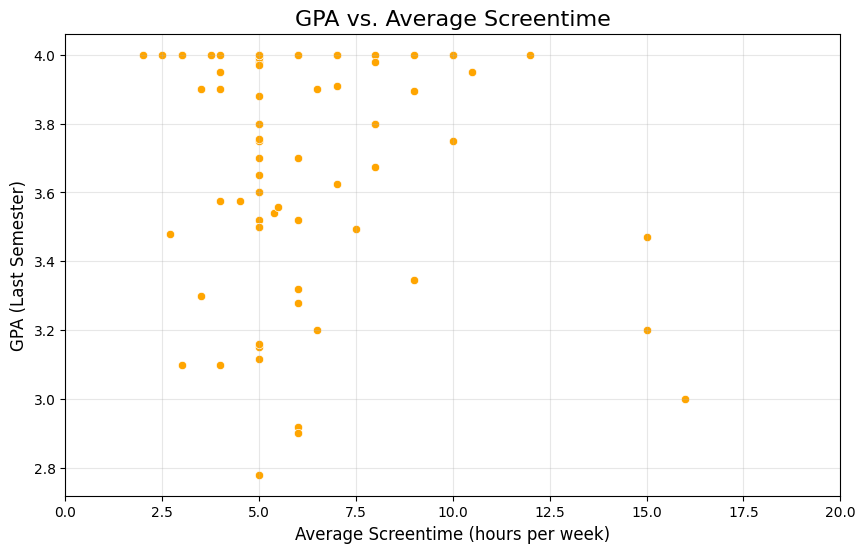

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for GPA vs. Average Screentime
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x = df['What is your average screentime?'],
    y = df['What was your GPA LAST SEMESTER?'],
    color='orange'
)
plt.title('GPA vs. Average Screentime', fontsize=16)
plt.xlabel('Average Screentime (hours per week)', fontsize=12)
plt.ylabel('GPA (Last Semester)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, 20)
plt.show()

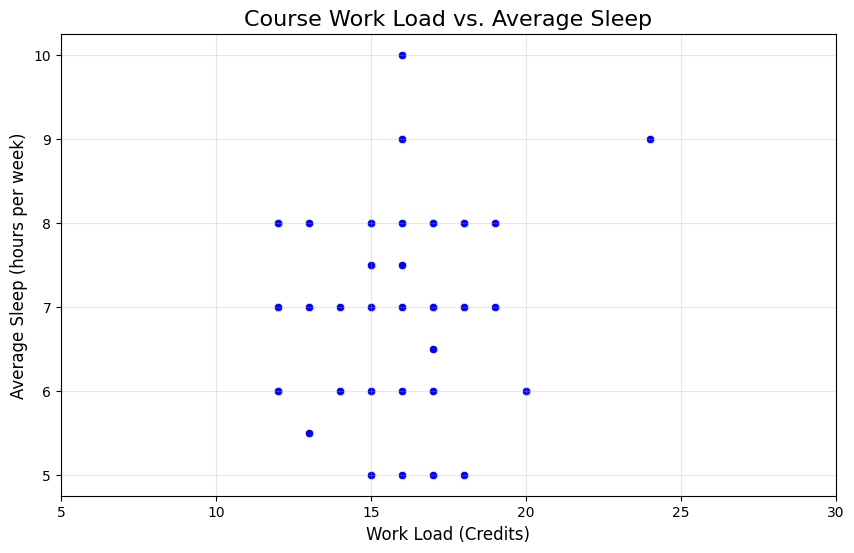

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for course load vs. Average sleep
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x = df['How many credits did you take last semester?'],
    y = df['How many hours of sleep do you get a night?'],
    color='blue'
)
plt.title('Course Work Load vs. Average Sleep', fontsize=16)
plt.ylabel('Average Sleep (hours per week)', fontsize=12)
plt.xlabel('Work Load (Credits)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(5, 30)
plt.show()

In [39]:
# testing private school attendance vs gpa

from scipy.stats import ttest_ind, mannwhitneyu

# Extract GPA for private vs non-private school attendees
private_school = df[df['Have you at any point attended private school?'] == 'Yes']['GPA']
non_private_school = df[df['Have you at any point attended private school?'] == 'No']['GPA']

# assume normal dist because n > 30

# Two-Sample t-test

# take out equal var??
t_stat, t_p = ttest_ind(private_school, non_private_school, equal_var=False)  # Welch's t-test
print(f"T-test: t-statistic = {t_stat}, p-value = {t_p}")

# given that p value is greater than .05
# there is not statistical significance that attending a private school effects GPA

T-test: t-statistic = -0.6468846587643688, p-value = 0.5228604310485787


In [36]:
from scipy.stats import ttest_ind

# Extract GPA for taking notes vs not taking notes
notes = df[df['Do you take notes in classes?'].str.contains('Yes', regex = False) == True]['GPA']
no_notes = df[df['Do you take notes in classes?'] == 'No']['GPA']

# assume normal dist because n > 30

# Two-Sample t-test
t_stat, t_p = ttest_ind(notes, no_notes)
print(f"T-test: t-statistic = {t_stat}, p-value = {t_p}")
# given that p value is greater than .05
# there is not statistical significance that taking notes effects GPA

# Mann-Whitney U test
u_stat, p_value = mannwhitneyu(notes, no_notes, alternative='two-sided')
print(f"Mann-Whitney U Test: U-statistic = {u_stat}, p-value = {p_value}")
# given that p value is greater than .05
# there is not statistical significance that taking notes effects GPA


T-test: t-statistic = 0.23244939596948053, p-value = 0.8168577342213902
Mann-Whitney U Test: U-statistic = 250.5, p-value = 0.7185982525205985


In [44]:
from scipy.stats import ttest_ind

# Extract GPA for taking notes vs not taking notes
study_with = df[df['Do you study with friends?'].str.contains('Never', regex = False) == False]['GPA']
study_self = df[df['Do you study with friends?'] == 'Never']['GPA']

# assume normal dist because n > 30

# Two-Sample t-test
t_stat, t_p = ttest_ind(study_self, study_with)
print(f"T-test: t-statistic = {t_stat}, p-value = {t_p}")
# given that p value is greater than .05
# there is not statistical significance that taking notes effects GPA

# Mann-Whitney U test
u_stat, p_value = mannwhitneyu(study_self, study_with, alternative='two-sided')
print(f"Mann-Whitney U Test: U-statistic = {u_stat}, p-value = {p_value}")
# given that p value is greater than .05
# there is not statistical significance that taking notes effects GPA#


T-test: t-statistic = 0.7027783070650259, p-value = 0.4844918634094004
Mann-Whitney U Test: U-statistic = 517.0, p-value = 0.7805956444497104


In [33]:
df['Do you take notes in classes?'].str.contains('Yes', regex = False)

,Do you take notes in classes?
0,True
1,True
2,True
3,True
4,True
...,...
68,True
69,True
70,True
71,True


In [14]:
df['What was your GPA THE SEMESTER BEFORE THAT?'].quantile(.75)

df['What was your GPA LAST SEMESTER?'].quantile(.25)

3.5

In [26]:
from scipy.stats import spearmanr, pearsonr

# Spearman correlation
# use because non linear relationship
r, p = spearmanr(df['What is your average screentime?'], df['GPA'])
print(f"Spearman Correlation: r={r}, p={p}")

# a -0.04 coefficient shows a weak relationship between
# average screen time and gpa

Spearman Correlation: r=-0.047346482901382804, p=0.690799988970989


In [27]:
from scipy.stats import spearmanr, pearsonr

# Spearman correlation
# use because non linear relationship
r, p = spearmanr(df['How many hours of sleep do you get a night?'], df['GPA'])
print(f"Spearman Correlation: r={r}, p={p}")

# a 0.2 coefficient shows a weak relationship between
# average hours of sleep and gpa

Spearman Correlation: r=0.2182833847449039, p=0.06355837481197937


In [59]:
from scipy.stats import spearmanr, pearsonr

# Spearman correlation
# use because non linear relationship
r, p = spearmanr(df['How many credits did you take last semester?'], df['How many hours of sleep do you get a night?'])
print(f"Spearman Correlation: r={r}, p={p}")

# a 0.03 coefficient shows a very weak relationship between
# average hours of sleep and credits taken last sem

Spearman Correlation: r=0.033440622290129784, p=0.7788147589928276


SignificanceResult(statistic=0.033440622290129784, pvalue=0.7788147589928276)